## Initial setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/set_your_path/weatherHistory.csv')

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


## (a) Data mining process

### (i) Handling missing values

In [ ]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [ ]:
df['Precip Type'].unique()

array(['rain', 'snow', nan], dtype=object)

In [ ]:
value_counts = df['Precip Type'].value_counts()
value_counts

rain    85224
snow    10712
Name: Precip Type, dtype: int64

Since 'Precip Type' is categorical & has approximately 8x occurence for rain when compared to snow, I fill the null values with the mode, 'rain'.

In [ ]:
df["Precip Type"].fillna("rain", inplace=True)

In [ ]:
df['Precip Type'].unique()

array(['rain', 'snow'], dtype=object)

In [ ]:
value_counts = df['Precip Type'].value_counts()
value_counts

rain    85741
snow    10712
Name: Precip Type, dtype: int64

In [ ]:
# total_records = 96453
# null_count = 517
# null_percentage = (null_count/total_records)*100
# null_percentage

 <!-- Since null values percentage in column "Precip Type" is around 0.5%, I drop the null records from the dataframe.  -->

In [ ]:
#df.dropna(inplace=True)

### Handling outliers

In [ ]:
import numpy as np
from scipy import stats

numerical_columns = ["Temperature (C)", "Apparent Temperature (C)", "Humidity",
                     "Wind Speed (km/h)", "Wind Bearing (degrees)", "Visibility (km)",
                     "Pressure (millibars)"]

In [ ]:
# Method 1: Z-Score method
z_scores = np.abs(stats.zscore(df[numerical_columns]))
threshold = 3  # You can adjust this threshold
outliers_zscore = (z_scores > threshold).any(axis=1)
outliers_by_zscore = df[outliers_zscore]
outliers_by_zscore

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
81,2006-04-12 09:00:00.000 +0200,Breezy and Mostly Cloudy,rain,7.133333,2.688889,0.80,32.1678,349.0,11.2056,0.0,1004.26,Foggy overnight and breezy in the morning.
858,2006-08-14 18:00:00.000 +0200,Partly Cloudy,rain,22.477778,22.477778,0.58,10.8192,159.0,11.1251,0.0,0.00,Mostly cloudy until night.
874,2006-08-15 10:00:00.000 +0200,Partly Cloudy,rain,21.061111,21.061111,0.73,7.7924,264.0,11.2056,0.0,0.00,Partly cloudy until evening.
924,2006-08-17 12:00:00.000 +0200,Clear,rain,28.838889,29.611111,0.51,9.6600,177.0,9.9820,0.0,0.00,Partly cloudy until morning.
945,2006-08-18 09:00:00.000 +0200,Clear,rain,24.950000,24.950000,0.69,16.0195,180.0,9.9015,0.0,0.00,Partly cloudy starting overnight continuing un...
...,...,...,...,...,...,...,...,...,...,...,...,...
93153,2016-03-23 12:00:00.000 +0100,Clear,rain,5.100000,1.800000,0.92,15.6009,51.0,7.2128,0.0,0.00,Overcast starting in the afternoon.
93635,2016-05-13 15:00:00.000 +0200,Breezy and Mostly Cloudy,rain,22.000000,22.000000,0.50,33.9710,220.0,9.9820,0.0,997.59,Partly cloudy throughout the day and breezy in...
93679,2016-05-15 11:00:00.000 +0200,Breezy and Overcast,rain,12.194444,12.194444,0.75,31.5882,332.0,10.2235,0.0,1011.05,Mostly cloudy throughout the day.
93683,2016-05-15 15:00:00.000 +0200,Breezy and Overcast,rain,12.105556,12.105556,0.57,33.0855,330.0,9.9820,0.0,1012.39,Mostly cloudy throughout the day.


In [ ]:
# Method 2: IQR method
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)
outliers_by_iqr = df[outliers_iqr]
outliers_by_iqr

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
37,2006-04-10 13:00:00.000 +0200,Mostly Cloudy,rain,20.044444,20.044444,0.40,28.3682,170.0,9.9820,0.0,1012.22,Mostly cloudy throughout the day.
38,2006-04-10 14:00:00.000 +0200,Mostly Cloudy,rain,21.050000,21.050000,0.40,26.9031,187.0,10.3523,0.0,1011.44,Mostly cloudy throughout the day.
70,2006-04-11 22:00:00.000 +0200,Overcast,rain,7.688889,3.722222,0.96,28.1267,339.0,4.4436,0.0,1005.14,Foggy in the evening.
73,2006-04-12 01:00:00.000 +0200,Foggy,rain,8.177778,4.372222,0.93,27.8691,19.0,3.2039,0.0,1004.89,Foggy overnight and breezy in the morning.
78,2006-04-12 06:00:00.000 +0200,Overcast,rain,6.088889,1.650000,0.93,28.0945,349.0,7.9695,0.0,1003.57,Foggy overnight and breezy in the morning.
...,...,...,...,...,...,...,...,...,...,...,...,...
95602,2016-10-04 13:00:00.000 +0200,Overcast,rain,12.266667,12.266667,0.86,27.5954,280.0,9.0643,0.0,1016.82,Mostly cloudy throughout the day.
95612,2016-10-04 23:00:00.000 +0200,Breezy and Overcast,rain,10.077778,10.077778,0.81,29.1249,9.0,14.9569,0.0,1017.13,Mostly cloudy throughout the day.
95844,2016-09-13 15:00:00.000 +0200,Mostly Cloudy,rain,22.677778,22.677778,0.71,27.2412,89.0,9.9820,0.0,1015.80,Partly cloudy overnight.
95940,2016-09-17 15:00:00.000 +0200,Breezy and Mostly Cloudy,rain,27.522222,27.766667,0.48,29.4469,260.0,9.9820,0.0,1008.80,Partly cloudy throughout the day.


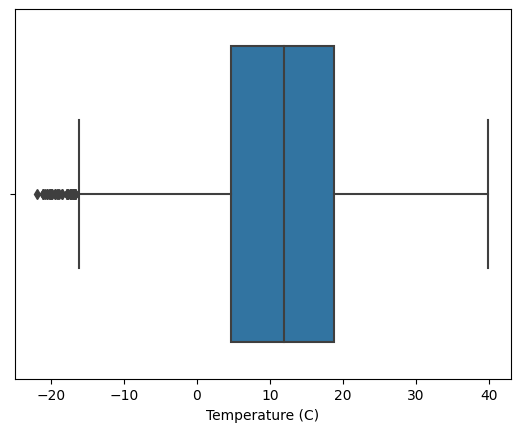

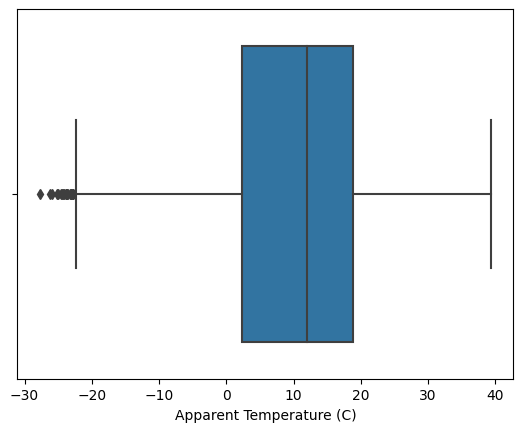

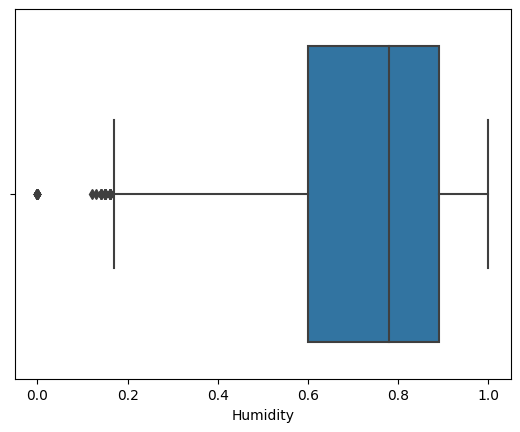

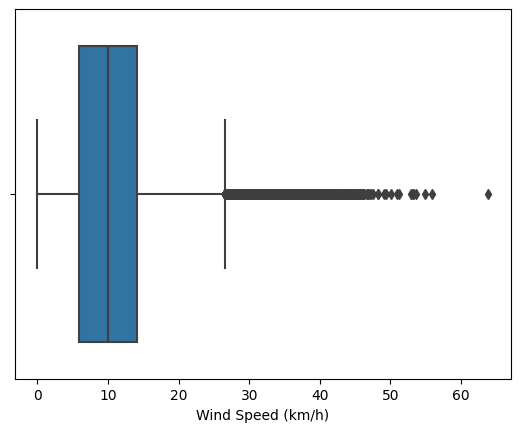

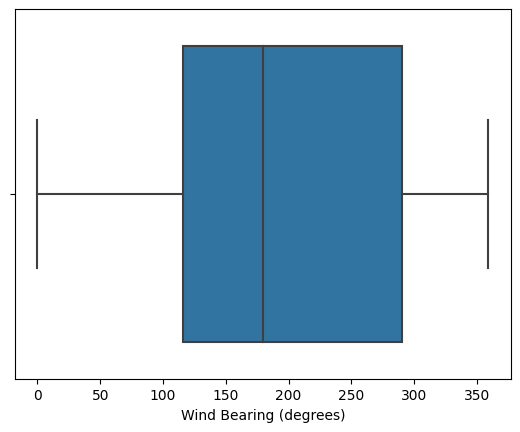

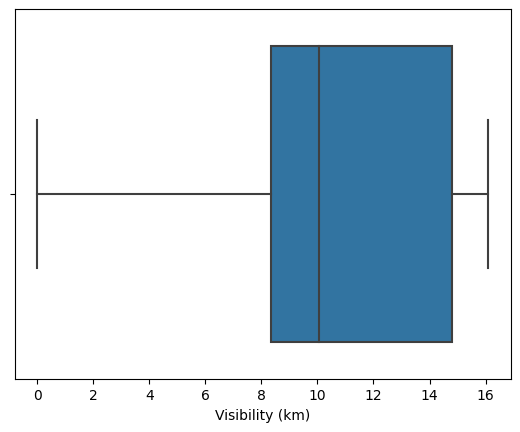

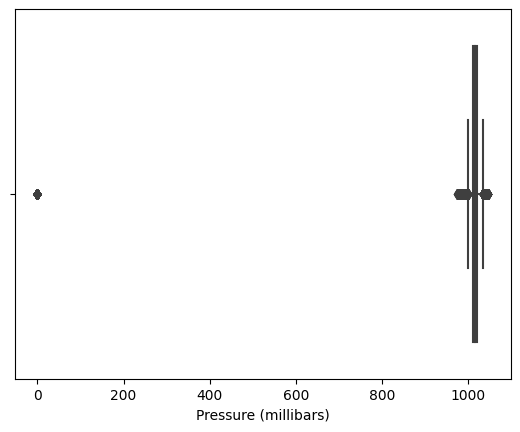

In [ ]:
# Method 3: Box Plots
import seaborn as sns
import matplotlib.pyplot as plt
for col in numerical_columns:
    sns.boxplot(x=df[col])
    plt.show()


In [ ]:
# Define the lower and upper bounds for pressure
lower_bound = 0
upper_bound = 800
threshold = 0

# Retrieve the records within the specified range
#filtered_records = df[(df["Pressure (millibars)"] > lower_bound) & (df["Pressure (millibars)"] < upper_bound)]
filtered_records = df[df["Pressure (millibars)"] == threshold]

print(filtered_records)


                      Formatted Date        Summary Precip Type  \
858    2006-08-14 18:00:00.000 +0200  Partly Cloudy        rain   
874    2006-08-15 10:00:00.000 +0200  Partly Cloudy        rain   
924    2006-08-17 12:00:00.000 +0200          Clear        rain   
945    2006-08-18 09:00:00.000 +0200          Clear        rain   
1074   2006-08-22 18:00:00.000 +0200  Partly Cloudy        rain   
...                              ...            ...         ...   
93147  2016-03-23 06:00:00.000 +0100          Clear        rain   
93149  2016-03-23 08:00:00.000 +0100          Clear        rain   
93150  2016-03-23 09:00:00.000 +0100          Clear        rain   
93152  2016-03-23 11:00:00.000 +0100          Clear        rain   
93153  2016-03-23 12:00:00.000 +0100          Clear        rain   

       Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
858          22.477778                 22.477778      0.58            10.8192   
874          21.061111           

There are 1288 records with 0 for Pressure (millibars) which is not possible. That means there is a fault in recording the data. I handle this by forward fill since the deviation of pressure from the closest records is very small.

In [ ]:
# Replace 0 values in the "Pressure (millibars)" column with forward fill
df["Pressure (millibars)"] = df["Pressure (millibars)"].replace(0, method='ffill')

In [ ]:
# Define the lower and upper bounds for Humidity
lower_bound = 0
upper_bound = 0.1
threshold = 0

# Retrieve the records within the specified range
#filtered_records = df[(df["Humidity"] > lower_bound) & (df["Humidity"] < upper_bound)]
filtered_records = df[df["Humidity"] == threshold]

print(filtered_records)
filtered_records.count()

                      Formatted Date        Summary Precip Type  \
19958  2008-02-17 14:00:00.000 +0100  Partly Cloudy        snow   
28101  2009-12-20 21:00:00.000 +0100          Clear        snow   
28103  2009-12-20 23:00:00.000 +0100          Clear        snow   
28110  2009-12-21 06:00:00.000 +0100          Clear        snow   
29627  2009-01-25 11:00:00.000 +0100          Foggy        rain   
54840  2012-02-10 00:00:00.000 +0100          Foggy        snow   
54858  2012-02-10 18:00:00.000 +0100          Foggy        snow   
54870  2012-02-11 06:00:00.000 +0100       Overcast        snow   
54872  2012-02-11 08:00:00.000 +0100       Overcast        snow   
54873  2012-02-11 09:00:00.000 +0100       Overcast        snow   
55086  2012-02-02 06:00:00.000 +0100  Partly Cloudy        snow   
55088  2012-02-02 08:00:00.000 +0100  Mostly Cloudy        snow   
55349  2012-02-03 05:00:00.000 +0100       Overcast        snow   
55350  2012-02-03 06:00:00.000 +0100       Overcast        sno

Formatted Date              22
Summary                     22
Precip Type                 22
Temperature (C)             22
Apparent Temperature (C)    22
Humidity                    22
Wind Speed (km/h)           22
Wind Bearing (degrees)      22
Visibility (km)             22
Loud Cover                  22
Pressure (millibars)        22
Daily Summary               22
dtype: int64

There are 22 records with 0 for Humidity which is not possible with the respective temperatures. That means there is a fault in recording the data. I handle this by forward fill since the deviation of Humidity from the closest records is very small.

In [ ]:
# Replace 0 values in the "Humidity" column with forward fill
df["Humidity"] = df["Humidity"].replace(0, method='ffill')

In [ ]:
# Define the lower and upper bounds for Wind Speed (km/h)
lower_bound = 60
upper_bound = 800
threshold = 60

# Retrieve the records within the specified range
#filtered_records = df[(df["Wind Speed (km/h)"] > lower_bound) & (df["Wind Speed (km/h)"] < upper_bound)]
filtered_records = df[df["Wind Speed (km/h)"] > threshold]

print(filtered_records)

                      Formatted Date                              Summary  \
12181  2007-01-29 13:00:00.000 +0100  Dangerously Windy and Partly Cloudy   

      Precip Type  Temperature (C)  Apparent Temperature (C)  Humidity  \
12181        rain         8.944444                  3.483333      0.49   

       Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
12181            63.8526                   307.0          11.4471         0.0   

       Pressure (millibars)                                      Daily Summary  
12181               1009.05  Mostly cloudy throughout the day and windy sta...  


Though the wind speed  63.8526 (km/h) looks as an outlier, it is confirmed through the Summary that it is not an fault data record. Though it affets the general behavior I though not to handle that record since it seems to be a true record.

Other numerical features are seems to be okay & cannot handle their outliers due to the distribution they represent.

### (ii) Produce Q-Q plots and histograms

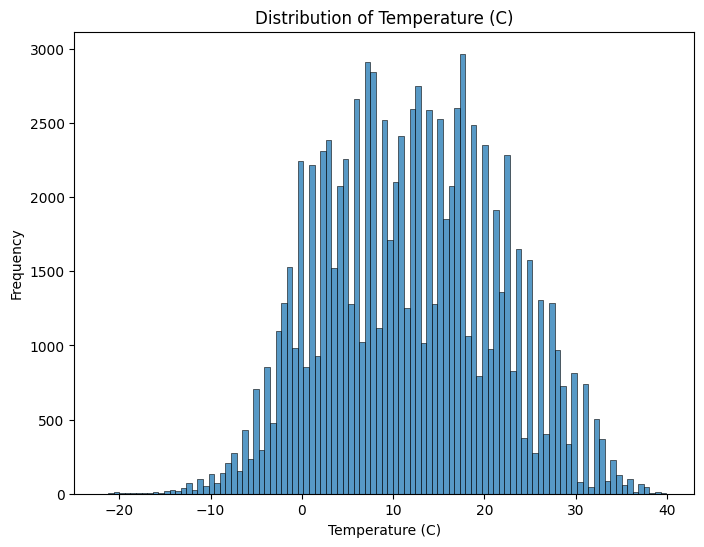

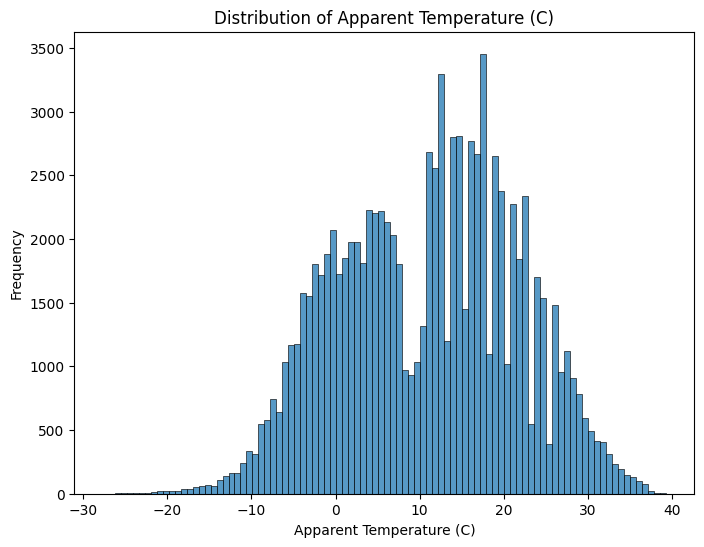

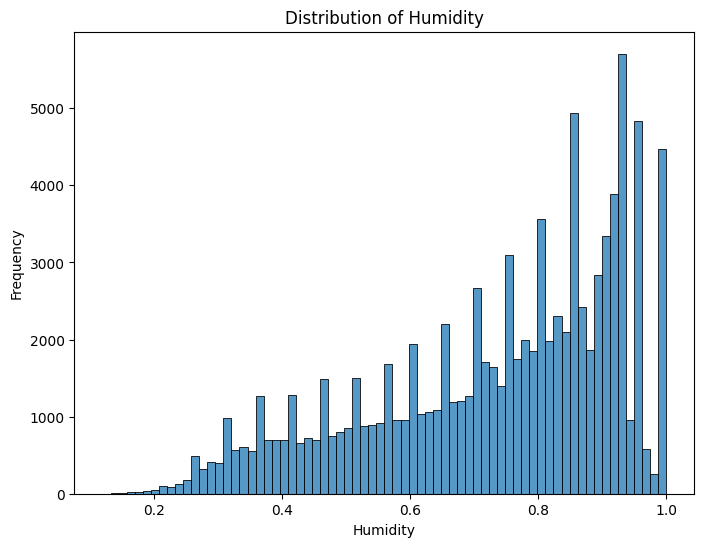

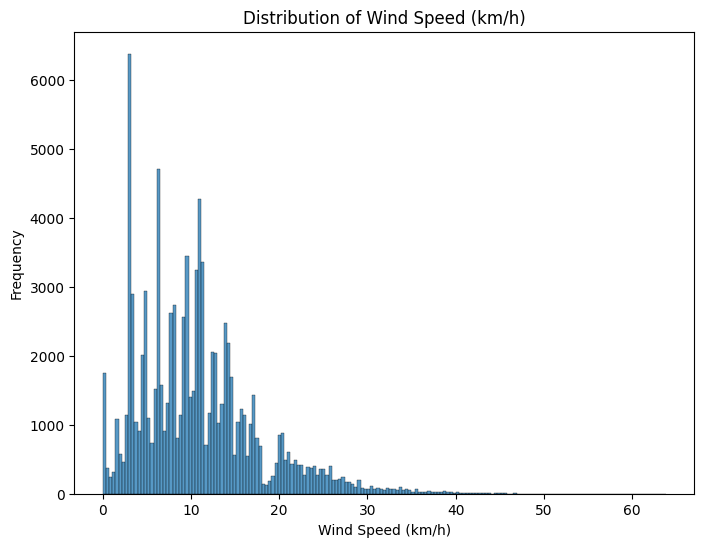

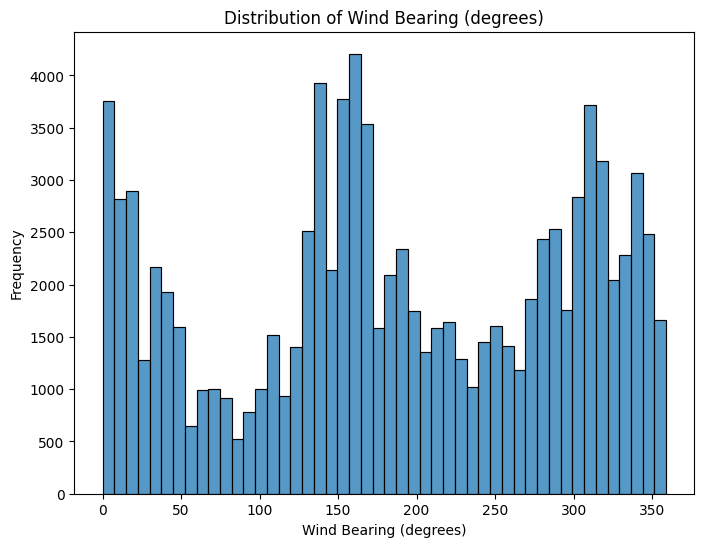

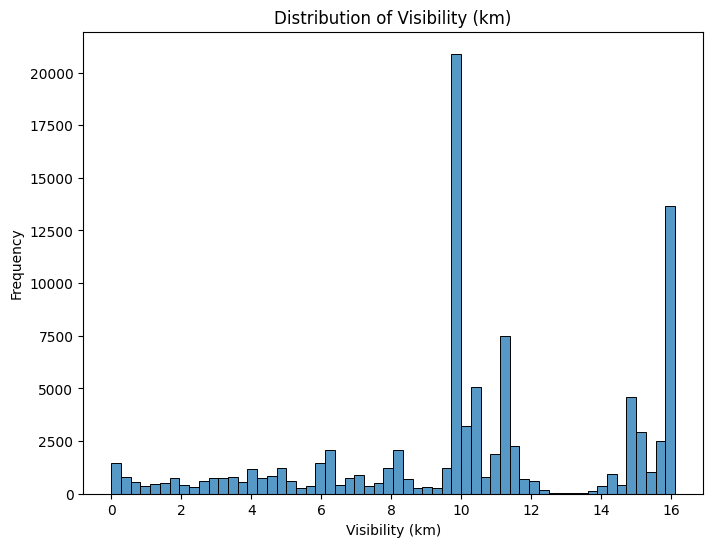

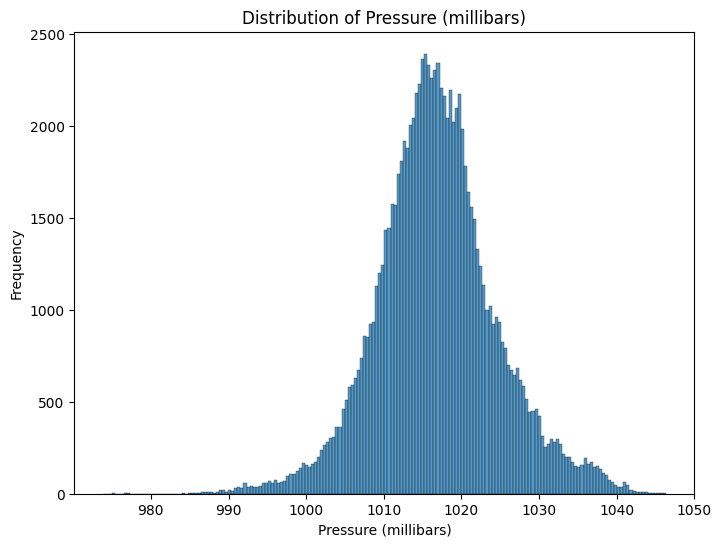

In [ ]:
# Loop through each numerical column and create distribution plots
for col in numerical_columns:
    plt.figure(figsize=(8, 6))  # Set the figure size
    sns.histplot(data=df, x=col)  # Create a histogram with a kernel density estimation (KDE) curve
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

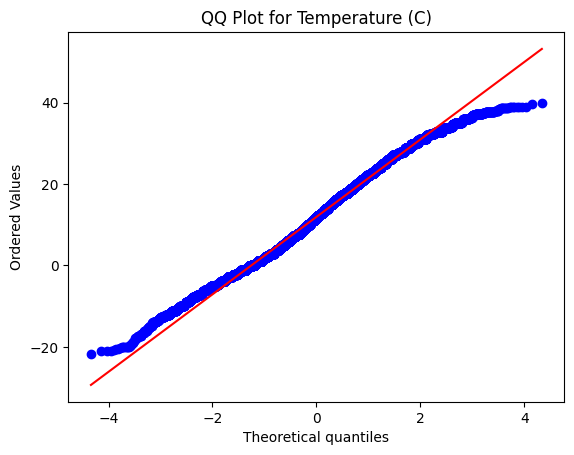

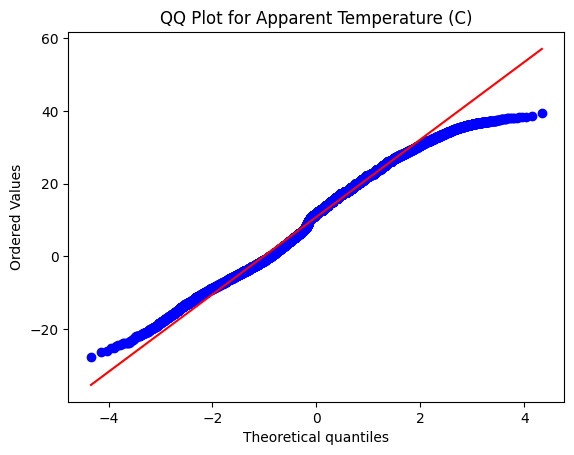

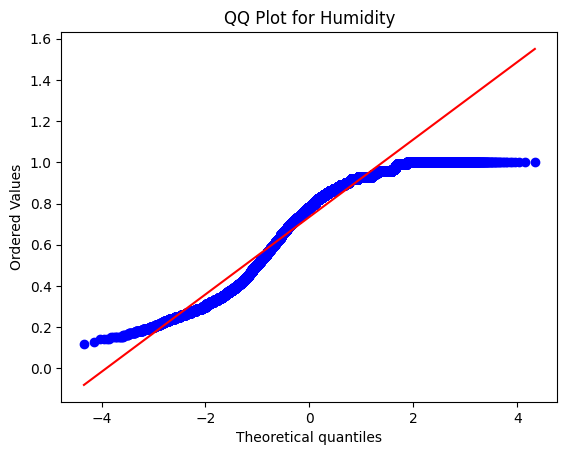

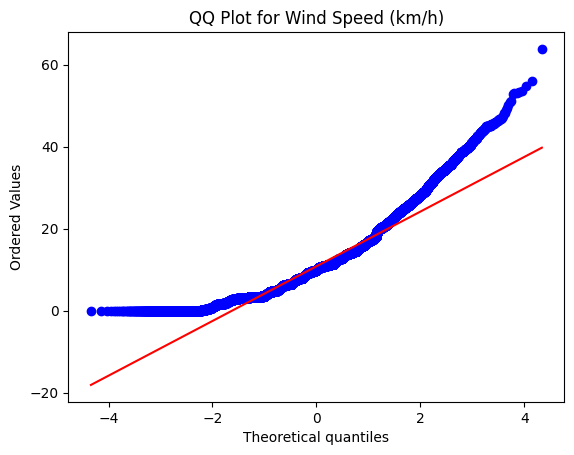

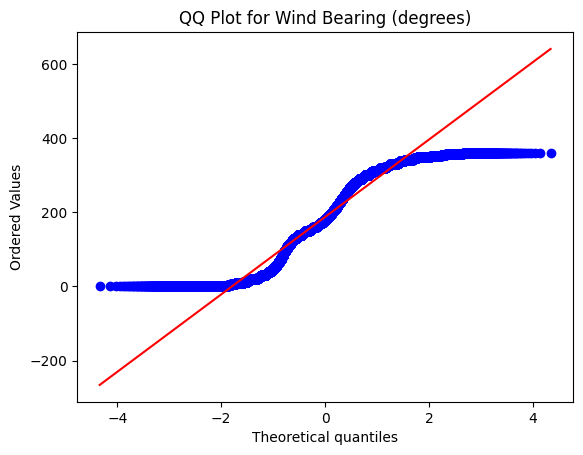

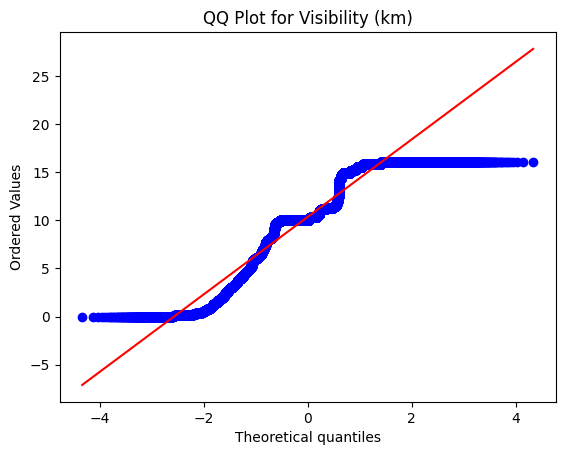

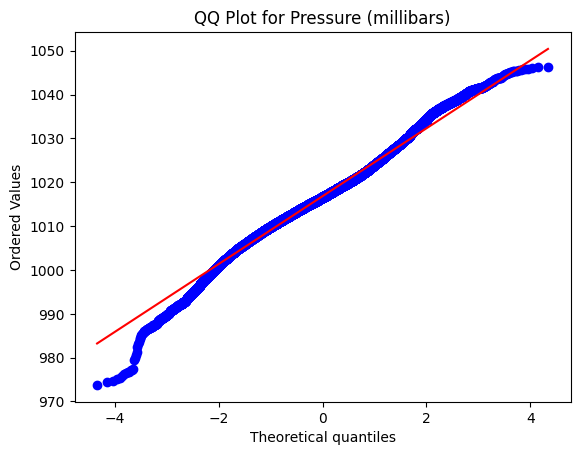

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define the columns you want to create QQ plots for
columns_to_plot = ["Temperature (C)", "Humidity"]

# Loop through the columns and create QQ plots
for col in numerical_columns :
    # Create a QQ plot
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f'QQ Plot for {col}')
    plt.show()


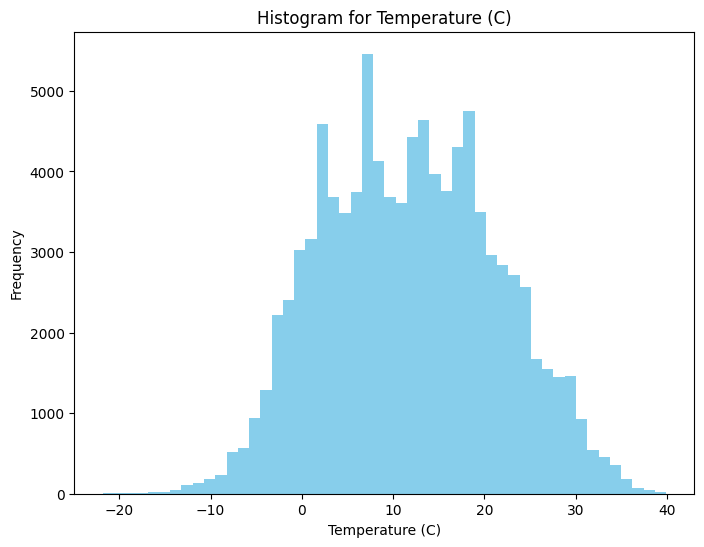

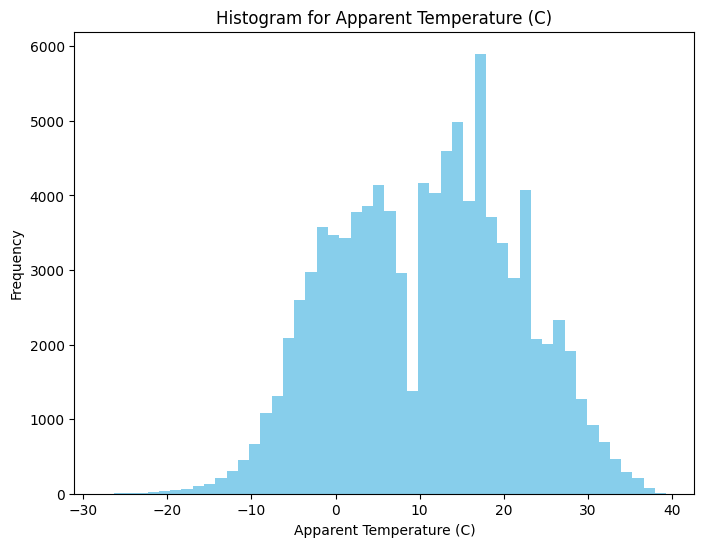

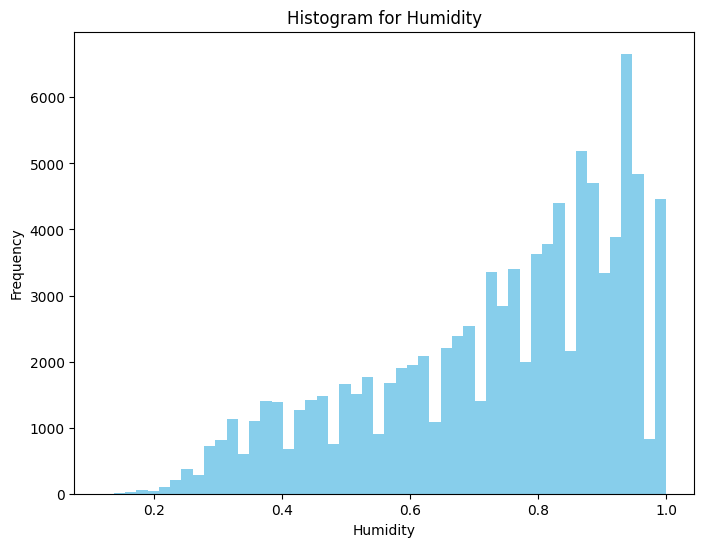

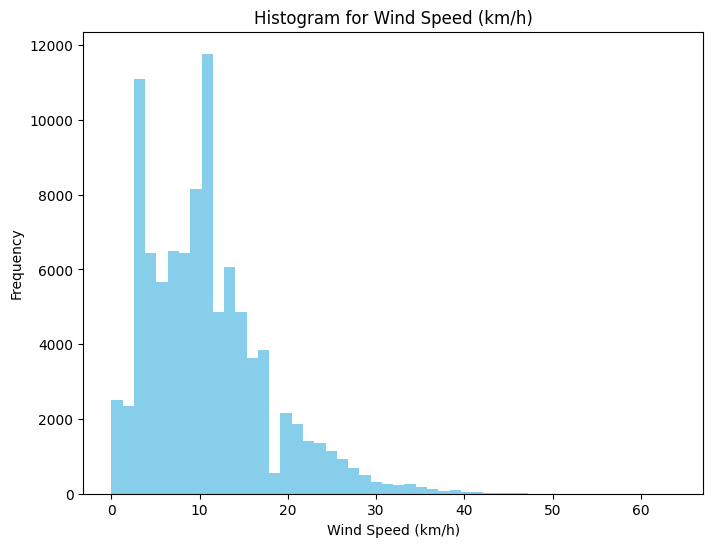

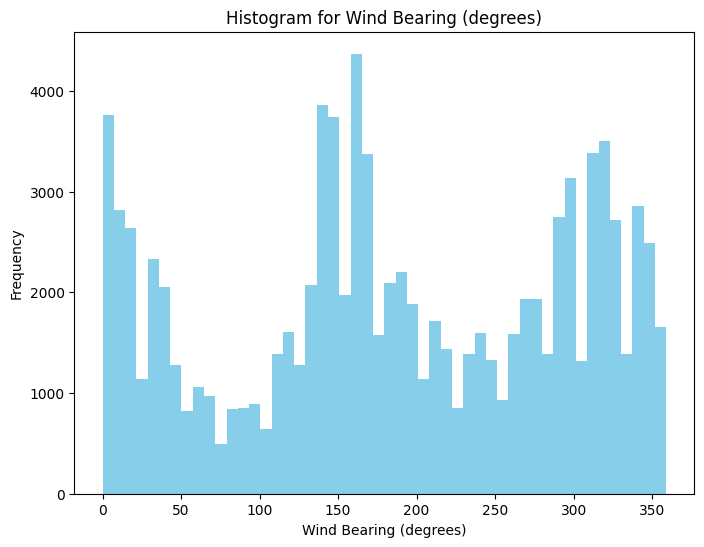

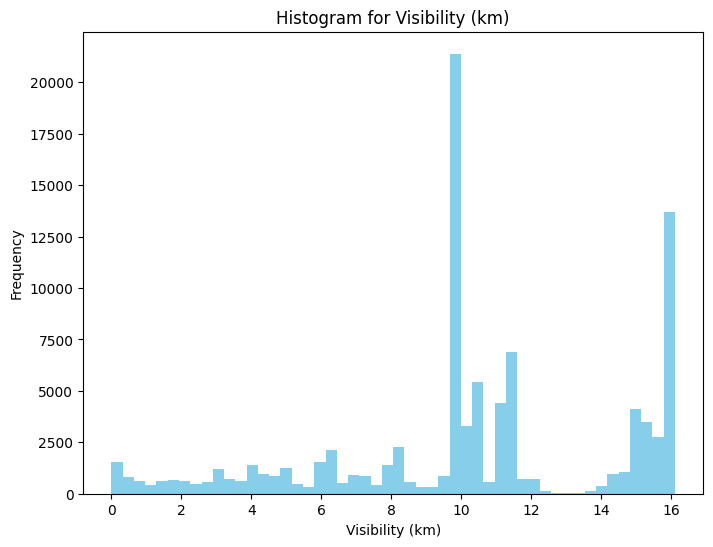

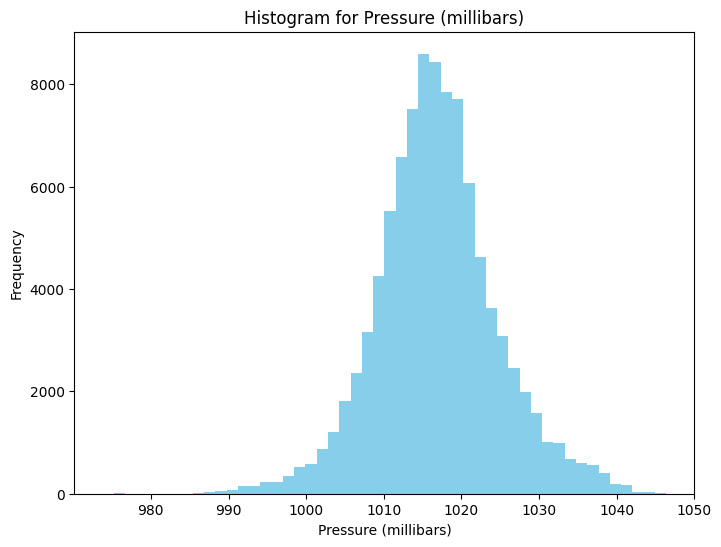

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loop through the columns and create histograms
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df[col], bins=50, color='skyblue')
    plt.title(f'Histogram for {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


### Transformations

In [ ]:
import numpy as np

# Apply an exponential transformation to the "Humidity" column
df["Humidity_exp"] = np.exp(df["Humidity"])


Exponential transformation done to reduce the lest skewness of the distribution.

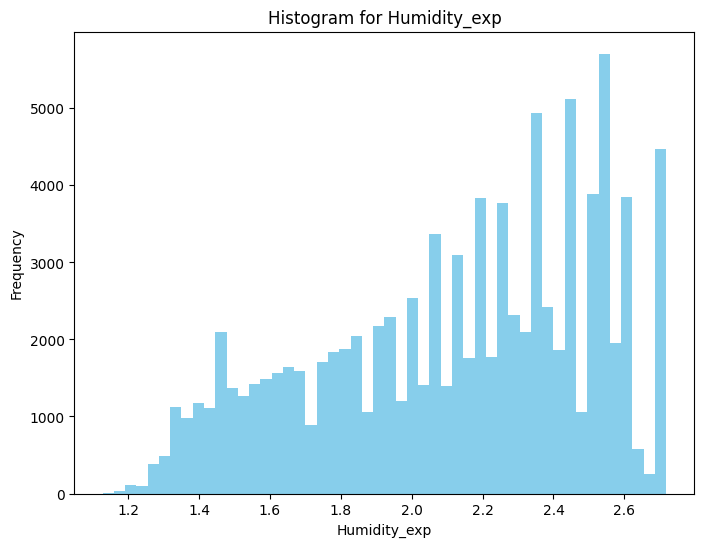

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df["Humidity_exp"], bins=50, color='skyblue')
plt.title(f'Histogram for {"Humidity_exp"}')
plt.xlabel("Humidity_exp")
plt.ylabel("Frequency")
plt.show()

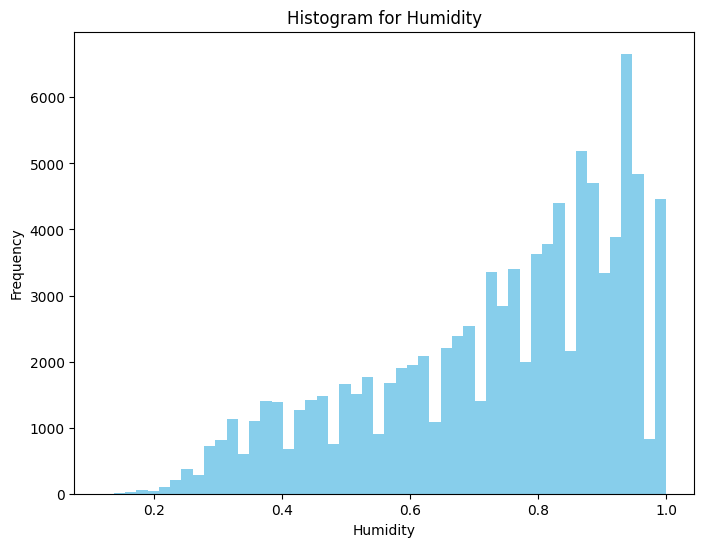

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df["Humidity"], bins=50, color='skyblue')
plt.title(f'Histogram for {"Humidity"}')
plt.xlabel("Humidity")
plt.ylabel("Frequency")
plt.show()

In [ ]:
import numpy as np

# Add a small constant (e.g., 1) to the "Wind Speed (km/h)" column to avoid zero values
small_constant = 1
df["Wind Speed (km/h)_log"] = np.log(df["Wind Speed (km/h)"] + small_constant)

Log tranformation done to reduce the right skewness. Added 1 to overcome wind speed 0 issue.

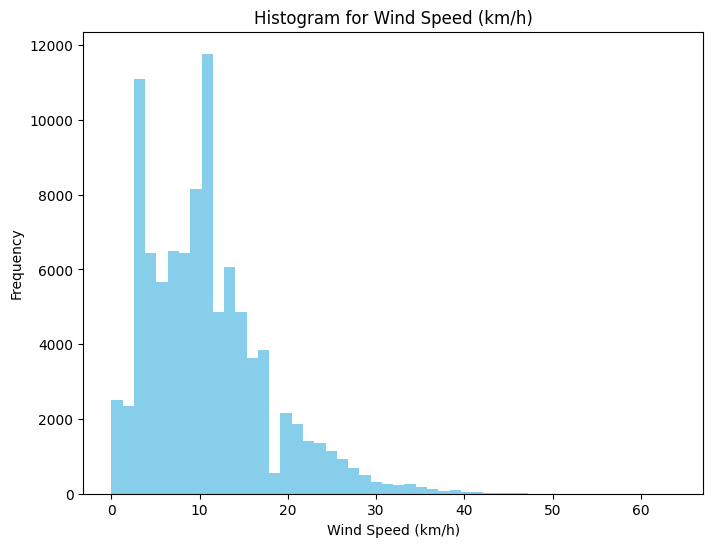

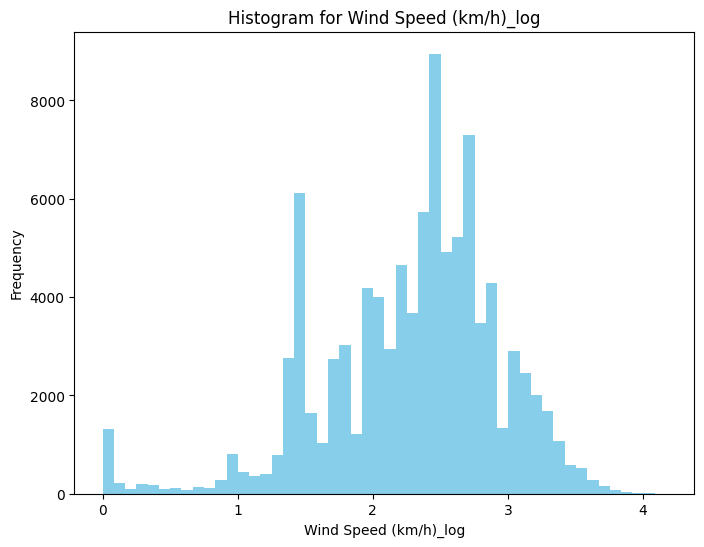

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df["Wind Speed (km/h)"], bins=50, color='skyblue')
plt.title(f'Histogram for {"Wind Speed (km/h)"}')
plt.xlabel("Wind Speed (km/h)")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(df["Wind Speed (km/h)_log"], bins=50, color='skyblue')
plt.title(f'Histogram for {"Wind Speed (km/h)_log"}')
plt.xlabel("Wind Speed (km/h)_log")
plt.ylabel("Frequency")
plt.show()

### (iii) Feature encoding

In [ ]:
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Humidity_exp,Wind Speed (km/h)_log
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2.435130,2.715999
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2.363161,2.725536
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2.435130,1.595014
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2.293319,2.714933
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2.293319,2.488616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.,1.537258,2.484598
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.,1.616074,2.406468
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.,1.750673,2.300964
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.,1.822119,2.444900


In [ ]:
df['Precip Type'].unique()

array(['rain', 'snow'], dtype=object)

Since only 2 categorical values are there & since there is no order, one hot encoding used.

In [ ]:
encoded_df = pd.get_dummies(df, columns=['Precip Type'], prefix='Precip Type')
df = encoded_df

In [ ]:
df

,Formatted Date,Summary,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Humidity_exp,Wind Speed (km/h)_log,Precip Type_rain,Precip Type_snow
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2.435130,2.715999,1,0
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2.363161,2.725536,1,0
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2.435130,1.595014,1,0
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2.293319,2.714933,1,0
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2.293319,2.488616,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.,1.537258,2.484598,1,0
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.,1.616074,2.406468,1,0
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.,1.750673,2.300964,1,0
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.,1.822119,2.444900,1,0


### (iv) Scaling & standardizing

In [ ]:
columns_to_drop = ['Formatted Date', 	'Summary', 'Daily Summary']
df = df.drop(columns=columns_to_drop, axis=1)

Since the categorical data & the timestamp has no correlation with the temperature & its redundant, drop the columns.

In [ ]:
df['Loud Cover'].unique()

array([0.])

In [ ]:
df = df.drop('Loud Cover', axis=1)

Since Loud cover (cloud cover) is 0 for all records, drop it.

In [ ]:
df

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Humidity_exp,Wind Speed (km/h)_log,Precip Type_rain,Precip Type_snow
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,2.435130,2.715999,1,0
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,2.363161,2.725536,1,0
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,2.435130,1.595014,1,0
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,2.293319,2.714933,1,0
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,2.293319,2.488616,1,0
...,...,...,...,...,...,...,...,...,...,...,...
96448,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36,1.537258,2.484598,1,0
96449,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16,1.616074,2.406468,1,0
96450,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66,1.750673,2.300964,1,0
96451,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95,1.822119,2.444900,1,0


## (c) Predict temperature

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler

# Define features and target variable
X = df[['Apparent Temperature (C)', 'Wind Bearing (degrees)', 'Visibility (km)',
          'Pressure (millibars)', 'Humidity_exp', 'Wind Speed (km/h)_log',
          'Precip Type_rain', 'Precip Type_snow']]
y = df['Temperature (C)']

# Split the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Standard Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [ ]:
# Assuming you've already loaded your data, split it, and standardized it as mentioned before

# I. Linear Regression with Cross-Validation
lr = LinearRegression()

# Fit the Linear Regression model with training data
lr.fit(X_train, y_train)

# Make predictions using the fitted model
lr_predictions = lr.predict(X_test)

# Calculate evaluation metrics
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, lr_predictions)

# Print the results
print("Linear Regression Metrics:")
print(f"MAE: {lr_mae:.2f}")
print(f"MSE: {lr_mse:.2f}")
print(f"RMSE: {lr_rmse:.2f}")
print(f"R²: {lr_r2:.2f}")


NameError: ignored

### (i) Linear Regression with Cross-Validation

In [ ]:
lr = LinearRegression()
lr_scores = cross_val_score(lr, X_train, y_train, cv=10)
lr_mean_score = np.mean(lr_scores)
print("Linear Regression CV Score:", lr_mean_score)



Linear Regression CV Score: 0.9903944163923397


### (ii) Lasso Regression with Cross-Validation

In [ ]:
lasso = LassoCV(cv=10)
lasso.fit(X_train, y_train)
lasso_alpha = lasso.alpha_
lasso_scores = cross_val_score(lasso, X_train, y_train, cv=10)
lasso_mean_score = np.mean(lasso_scores)
print("Lasso Regression CV Score:", lasso_mean_score)
print("Lasso Alpha:", lasso_alpha)

Lasso Regression CV Score: 0.9903857236786658
Lasso Alpha: 0.009468763456282723


### (iii) Ridge Regression with Cross-Validation

In [ ]:
ridge = RidgeCV(cv=10)
ridge.fit(X_train, y_train)
ridge_alpha = ridge.alpha_
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=10)
ridge_mean_score = np.mean(ridge_scores)
print("Ridge Regression CV Score:", ridge_mean_score)
print("Ridge Alpha:", ridge_alpha)


Ridge Regression CV Score: 0.9903944683159057
Ridge Alpha: 0.1


## (iv) Evaluation matrices

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming you've already trained the models as in the previous code

# Make predictions using each model
#lr_predictions = lr.predict(X_test)
lasso_predictions = lasso.predict(X_test)
ridge_predictions = ridge.predict(X_test)

# Calculate evaluation metrics
lr_mae = mean_absolute_error(y_test, lr_predictions)
lasso_mae = mean_absolute_error(y_test, lasso_predictions)
ridge_mae = mean_absolute_error(y_test, ridge_predictions)

lr_mse = mean_squared_error(y_test, lr_predictions)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
ridge_mse = mean_squared_error(y_test, ridge_predictions)

lr_rmse = np.sqrt(lr_mse)
lasso_rmse = np.sqrt(lasso_mse)
ridge_rmse = np.sqrt(ridge_mse)

lr_r2 = r2_score(y_test, lr_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)

# Print the results
print("Linear Regression Metrics:")
print(f"MAE: {lr_mae:.2f}")
print(f"MSE: {lr_mse:.2f}")
print(f"RMSE: {lr_rmse:.2f}")
print(f"R²: {lr_r2:.2f}")

print("\nLasso Regression Metrics:")
print(f"MAE: {lasso_mae:.2f}")
print(f"MSE: {lasso_mse:.2f}")
print(f"RMSE: {lasso_rmse:.2f}")
print(f"R²: {lasso_r2:.2f}")

print("\nRidge Regression Metrics:")
print(f"MAE: {ridge_mae:.2f}")
print(f"MSE: {ridge_mse:.2f}")
print(f"RMSE: {ridge_rmse:.2f}")
print(f"R²: {ridge_r2:.2f}")

Linear Regression Metrics:
MAE: 0.73
MSE: 0.87
RMSE: 0.93
R²: 0.99

Lasso Regression Metrics:
MAE: 0.73
MSE: 0.87
RMSE: 0.93
R²: 0.99

Ridge Regression Metrics:
MAE: 0.73
MSE: 0.87
RMSE: 0.93
R²: 0.99
